In [1]:
# NUMPY
import numpy as np
np.random.seed(3946)
# MATPLOTLIB
import matplotlib.pyplot as plt
plt.style.context('dark_background')
%matplotlib inline 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (16, 6)}
plt.rcParams.update(params)

# SEABORN 
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

# SKLEARN 
from sklearn.metrics import pairwise_distances

# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# TIME
from time import time 

# PATH 
import sys
path_files = '/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/'
sys.path.insert(0, path_files) 


# POT
import ot
from ot import sinkhorn, emd

# GREENKHORN 
from ot.bregman import greenkhorn

# SCREENKHORN
from screenkhorn.new_formulation import Screenkhorn
# from screenkhorn.screenkhornBFGS import Screenkhorn

# WDA 
import screenkhorn.wda_screen as wda_screen

In [2]:
#%% parameters

n = 1000  # nb samples in source and target datasets
nz = 0.2

# generate circle dataset
t = np.random.rand(n) * 2 * np.pi
ys = np.floor((np.arange(n) * 1.0 / n * 3)) + 1
xs = np.concatenate(
    (np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
xs = xs * ys.reshape(-1, 1) + nz * np.random.randn(n, 2)

t = np.random.rand(n) * 2 * np.pi
yt = np.floor((np.arange(n) * 1.0 / n * 3)) + 1
xt = np.concatenate(
    (np.cos(t).reshape((-1, 1)), np.sin(t).reshape((-1, 1))), 1)
xt = xt * yt.reshape(-1, 1) + nz * np.random.randn(n, 2)

nbnoise = 8

xs = np.hstack((xs, np.random.randn(n, nbnoise)))
xt = np.hstack((xt, np.random.randn(n, nbnoise)))

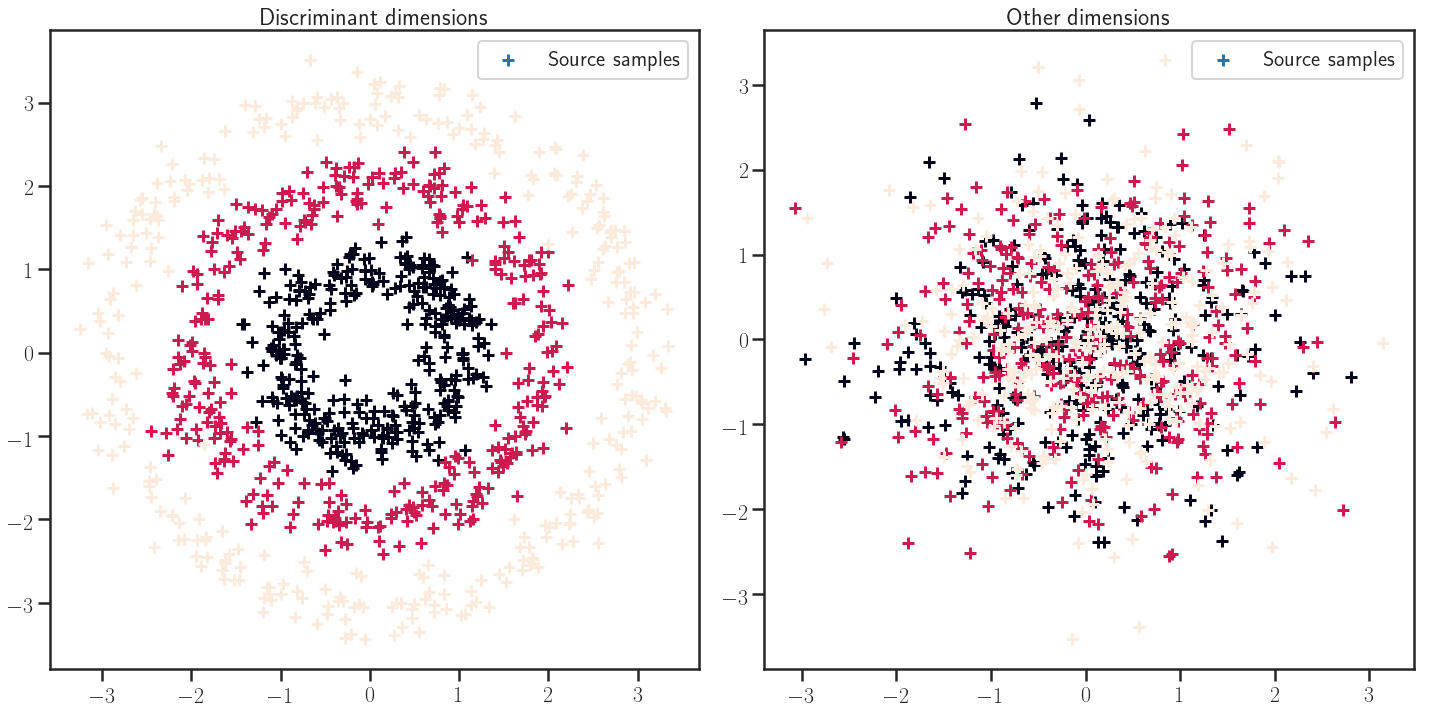

In [3]:
#%% plot samples
plt.figure(1, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(xt[:, 0], xt[:, 1], c=ys, marker='+', label='Source samples')
plt.legend(loc=0)
plt.title('Discriminant dimensions')

plt.subplot(1, 2, 2)
plt.scatter(xt[:, 2], xt[:, 3], c=ys, marker='+', label='Source samples')
plt.legend(loc=0)
plt.title('Other dimensions')
plt.tight_layout()

In [4]:
#%% Compute FDA
p = 2

Pfda, projfda = wda_screen.fda(xs, ys, p)

## Compute WDA with sinkhorn

In [5]:
#%% 
p = 2
reg = 1e0
k = 10
maxiter = 100

Pwda_sink, projwda_sink = wda_screen.wda_sinkhorn(xs, ys, p, reg, k, maxiter=maxiter)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+8.5789934287744929e-01	5.14376205e-01
    2	+4.6046716547275018e-01	2.57325996e-01
    3	+4.3523255017037699e-01	2.16974424e-01
    4	+3.7344362589984076e-01	2.46983033e-01
    5	+2.4760606956121115e-01	1.43090549e-01
    6	+2.3728004849388618e-01	1.06067861e-01
    7	+2.2843247528830363e-01	2.09229946e-02
    8	+2.2829638658297988e-01	1.60484682e-02
    9	+2.2816000287272267e-01	8.01778312e-03
   10	+2.2812644105886701e-01	4.08720360e-03
   11	+2.2811693492265181e-01	1.77327472e-03
   12	+2.2811474725950398e-01	1.42574979e-04
   13	+2.2811473363274426e-01	2.89144913e-05
   14	+2.2811473317070027e-01	1.32285539e-05
   15	+2.2811473314503961e-01	1.17594411e-05
   16	+2.2811473306965066e-01	5.51473378e-06
   17	+2.2811473306111155e-01	4.26554644e-06
   18	+2.2811473304989263e-01	1.46360075e-06
   19	+2.2811473304953847e-01	1.27877180e-06
   20	+2.2811473304856095e-01	4.86068190e-07


In [6]:
Pwda_sink, projwda_sink

(array([[-0.93283747,  0.35663528],
        [-0.35749406, -0.93273931],
        [ 0.00511557,  0.00407483],
        [-0.03281222,  0.01039209],
        [ 0.00144844, -0.02223009],
        [-0.02499597, -0.00310239],
        [-0.00626701, -0.02195684],
        [-0.00756145,  0.01743604],
        [ 0.01106712, -0.02477041],
        [-0.00797607,  0.02793854]]),
 <function screenkhorn.wda_screen.wda_sinkhorn.<locals>.proj(X)>)

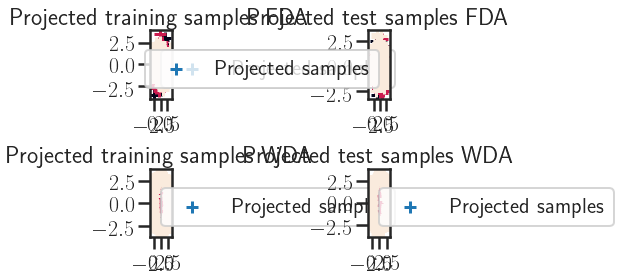

In [7]:
#%% plot samples

xsp = projfda(xs)
xtp = projfda(xt)

xspw = projwda_sink(xs)
xtpw = projwda_sink(xt)

plt.figure(2)

plt.subplot(2, 2, 1)
plt.scatter(xsp[:, 0], xsp[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected training samples FDA')

plt.subplot(2, 2, 2)
plt.scatter(xtp[:, 0], xtp[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected test samples FDA')

plt.subplot(2, 2, 3)
plt.scatter(xspw[:, 0], xspw[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected training samples WDA')

plt.subplot(2, 2, 4)
plt.scatter(xtpw[:, 0], xtpw[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected test samples WDA')
plt.tight_layout()


## Compute WDA with screenkhorn 

In [8]:
Pwda_screen, projwda_screen = wda_screen.wda_screenkhorn(xs, ys, p, reg, k, solver=None, maxiter=maxiter)

Compiling cost function...
Computing gradient of cost function...
 iter		   cost val	    grad. norm
    1	+8.9538947855823803e-01	1.76383182e-01
    2	+4.5460815513685560e-01	2.12627793e-01
    3	+4.2720736892399414e-01	2.46618516e-01
    4	+3.9832051996529039e-01	2.01686813e-01
    5	+2.1545450523343435e-01	3.38346920e-01
    6	+1.6492083997385462e-01	2.91452946e-01
    7	+1.1992191323900264e-01	7.12543055e-02
    8	+1.1485446299246650e-01	1.14969665e-01
    9	+1.1473339098827960e-01	1.13447982e-01
   10	+1.1473335779495772e-01	1.13447926e-01
   11	+1.1473335093794090e-01	1.13447906e-01
Terminated - min stepsize reached after 11 iterations, 1.81 seconds.



In [9]:
Pwda_screen, projwda_screen

((array([[-0.49461788,  0.85098696],
         [-0.85356945, -0.50715763],
         [-0.0571311 ,  0.05203058],
         [-0.02941937, -0.03420994],
         [-0.06622141,  0.00926768],
         [-0.11439536,  0.05060498],
         [-0.03423041, -0.02430135],
         [-0.04830697,  0.07919558],
         [ 0.00650051, -0.07219366],
         [-0.04029612,  0.00369555]]),
  {'solver': 'SteepestDescent',
   'stoppingcriteria': {'maxtime': 1000,
    'maxiter': 100,
    'mingradnorm': 1e-06,
    'minstepsize': 1e-10,
    'maxcostevals': 5000},
   'solverparams': {'linesearcher': <pymanopt.solvers.linesearch.LineSearchBackTracking at 0x1a1e55dba8>},
   'stoppingreason': 'Terminated - min stepsize reached after 11 iterations, 1.81 seconds.',
   'final_values': {'x': array([[-0.49461788,  0.85098696],
           [-0.85356945, -0.50715763],
           [-0.0571311 ,  0.05203058],
           [-0.02941937, -0.03420994],
           [-0.06622141,  0.00926768],
           [-0.11439536,  0.05060498],
 

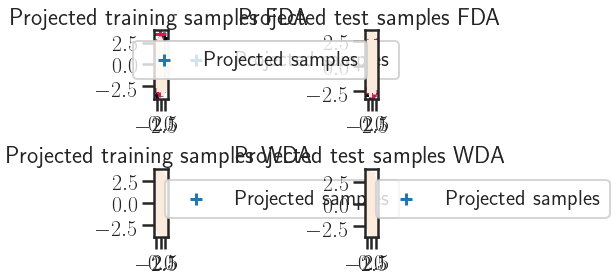

In [10]:
#%% plot samples

xsp = projfda(xs)
xtp = projfda(xt)

xspw_screen = projwda_screen(xs)
xtpw_screen = projwda_screen(xt)

plt.figure(2)

plt.subplot(2, 2, 1)
plt.scatter(xsp[:, 0], xsp[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected training samples FDA')

plt.subplot(2, 2, 2)
plt.scatter(xtp[:, 0], xtp[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected test samples FDA')

plt.subplot(2, 2, 3)
plt.scatter(xspw[:, 0], xspw_screen[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected training samples WDA')

plt.subplot(2, 2, 4)
plt.scatter(xtpw[:, 0], xtpw_screen[:, 1], c=ys, marker='+', label='Projected samples')
plt.legend(loc=0)
plt.title('Projected test samples WDA')
plt.tight_layout()